In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

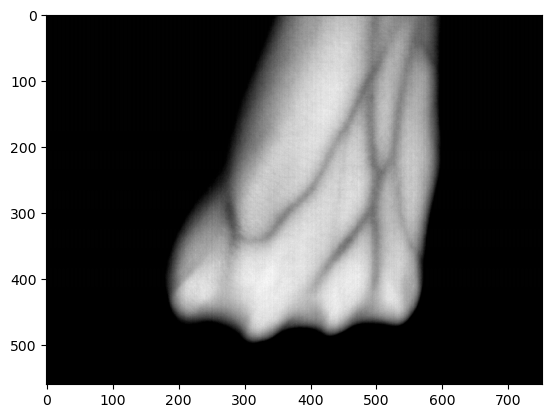

In [2]:
image = cv2.imread('Vein.png',0)
plt.imshow(image,cmap='gray')

In [3]:
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

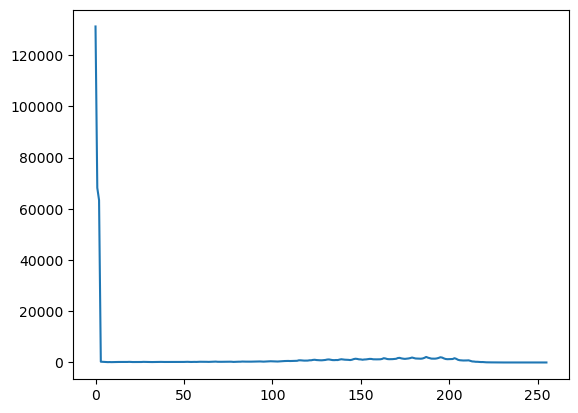

In [4]:
plt.plot(histogram)
plt.show()

### Segmentation by calculating threshold setting 

In [5]:
_, threshold = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

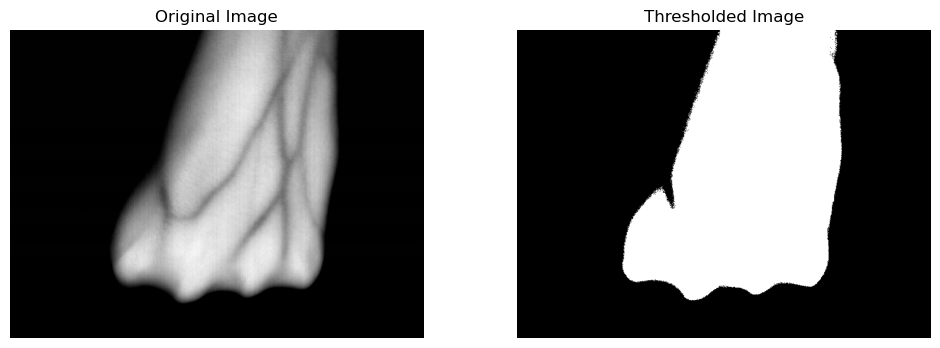

In [6]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(threshold, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.show()

### Segmentation using Adaptive Thresholding

In [7]:
adaptive_thresholded_image_gau = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

In [8]:
adaptive_thresholded_image_mean = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

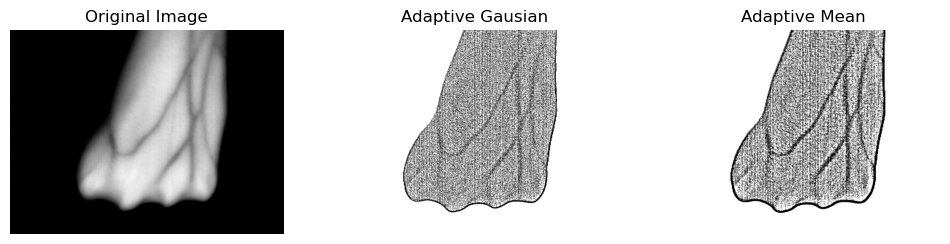

In [9]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(adaptive_thresholded_image_gau, cmap='gray')
plt.title('Adaptive Gausian')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(adaptive_thresholded_image_mean, cmap='gray')
plt.title('Adaptive Mean')
plt.axis('off')

plt.show()

### Image Segmentation using Watershed Algorithm

In [10]:
_, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [11]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

In [12]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)

In [13]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
_, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

In [14]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [15]:
_, markers = cv2.connectedComponents(sure_fg)

In [16]:
markers = markers+1

In [17]:
markers[unknown==255] = 0

In [18]:
img = cv2.imread("Vein.png")
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

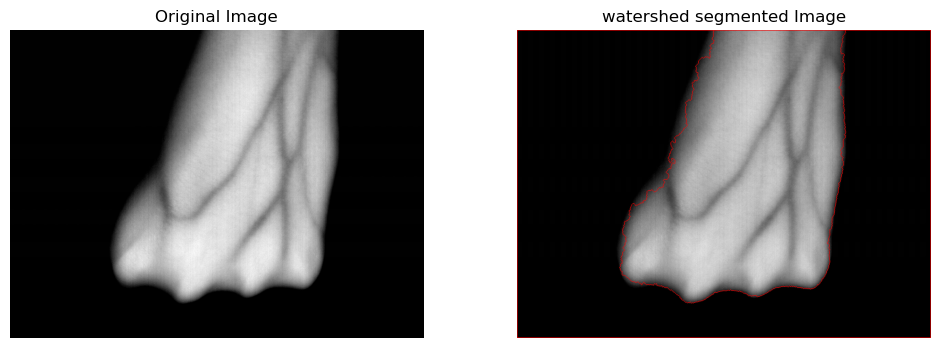

In [19]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img, cmap='gray')
plt.title('watershed segmented Image')
plt.axis('off')

plt.show()

### Morphological Transform

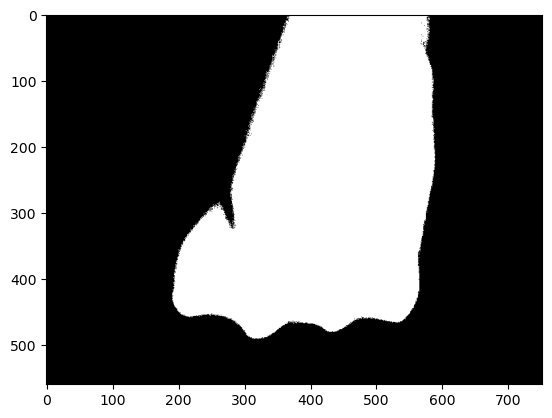

In [20]:
plt.imshow(threshold,cmap='gray')

In [21]:
circular_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
square_kernel = np.ones((5, 5), np.uint8)
cross_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

In [22]:
circular_kernel

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [23]:
square_kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [24]:
cross_kernel

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

### erosion and dilation with a circular structuring element

In [25]:
cirr_eroded = cv2.erode(threshold, circular_kernel, iterations=1)
cirr_dilated = cv2.dilate(threshold, circular_kernel, iterations=1)

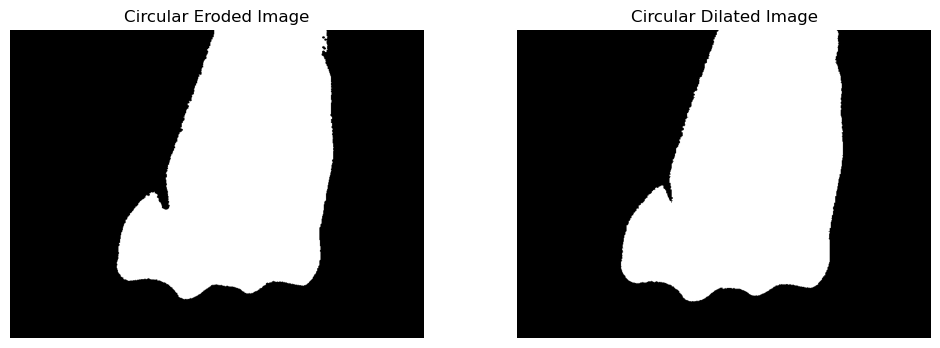

In [26]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(cirr_eroded, cmap='gray')
plt.title('Circular Eroded Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cirr_dilated, cmap='gray')
plt.title('Circular Dilated Image')
plt.axis('off')

plt.show()

### erosion and dilation with a square structuring element

In [27]:
square_erd = cv2.erode(threshold, square_kernel, iterations=1)
square_did = cv2.dilate(threshold, square_kernel, iterations=1)

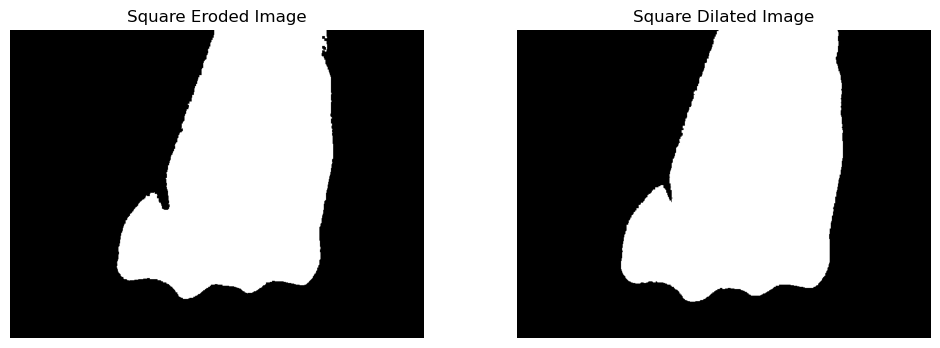

In [28]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(square_erd, cmap='gray')
plt.title('Square Eroded Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(square_did, cmap='gray')
plt.title('Square Dilated Image')
plt.axis('off')

plt.show()

### closing and opening with a cross shaped structuring element

In [29]:
cross_closed = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, cross_kernel)
cross_opened = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, cross_kernel)

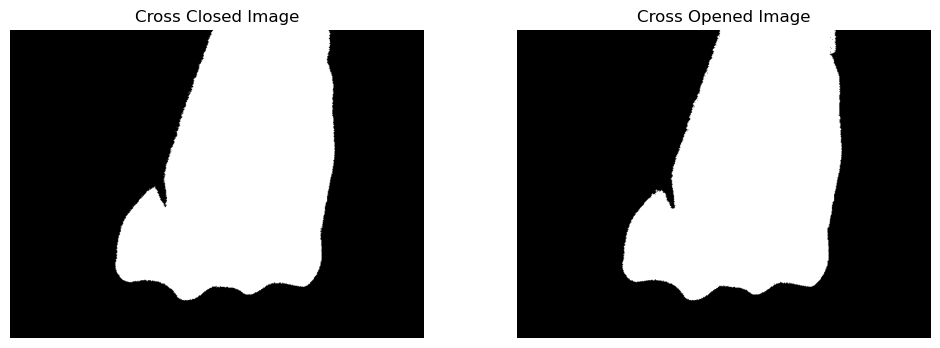

In [30]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(cross_closed, cmap='gray')
plt.title('Cross Closed Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cross_opened, cmap='gray')
plt.title('Cross Opened Image')
plt.axis('off')

plt.show()

### Mask of the Veins

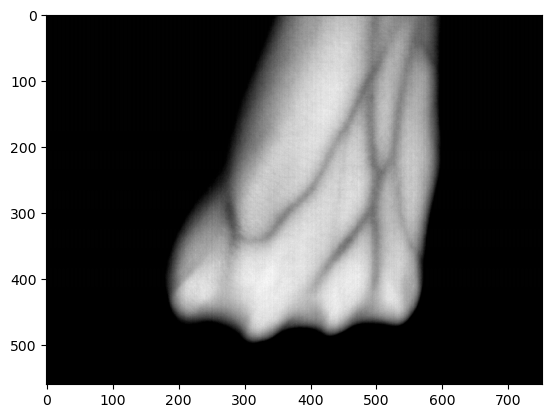

In [31]:
image = cv2.imread('Vein.png',0)
plt.imshow(image,cmap='gray')

In [32]:
def generate_vein_mask(image_path, threshold=150):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5, 5), np.uint8)
    binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
    binary_image = cv2.bitwise_not(binary_image)

    return binary_image

In [33]:
image_path = "Vein.png"
vein_mask = generate_vein_mask(image_path)

(-0.5, 751.5, 559.5, -0.5)

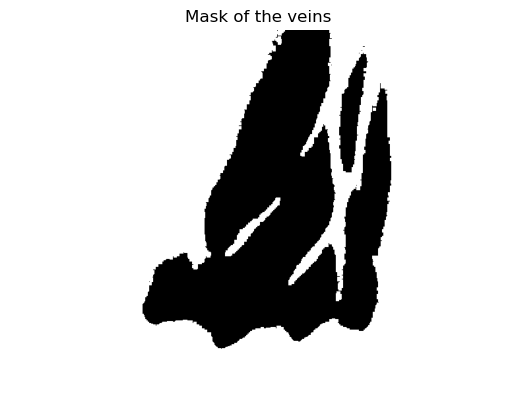

In [35]:
plt.imshow(vein_mask, cmap='gray')
plt.title('Mask of the veins')
plt.axis('off')